# Homework V - Regression

### <font color='red'>__Question I__</font> 
A series of measurements have been done on a vibrating system, which we can be simplified as a single degree-of-freedom. The stiffness of the system was changed and the time period of the system was measured. The data is recorded in a dataset and attached to this assingment with the name `Q1.csv`. This dataset includes stiffness values and the corresponding time period for the oscillation. Use <u>simple linear regression</u> to estimate the system's mass.

<font color='blue'>__NOTES :__</font>
- For a system with single degree-of-freedom, $\omega_n=\sqrt{\frac{k}{m}}$
- The time period of a system and its natural frequency are related with $\omega_n=\frac{2\pi}{T}$



- $\omega_n=\sqrt{\frac{k}{m}}$ 
- $\omega_n\ ^2 = \frac{1}{m} \times k$
- The time period of a system and its natural frequency are related with $\omega_n=\frac{2\pi}{T}$

In [18]:
# Your code goes here
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Mathematical process
df = pd.read_csv('C:\\Users\\tanka\\OneDrive\\바탕 화면\\Junior year\\Data_driven\\hw5\\Q1.csv')
df[['Natural Frequency(hz)']] = df[['Time Period (s)']]**(-1) * 2 * np.pi
#Linear regression
x_data = np.array(df[['Natural Frequency(hz)']] ** 2) #IV
y_data = np.array(df[['Stiffness (N/m)']]) #TARGET 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=100)
lml = LinearRegression()
lml.fit(x_train,y_train)

#Numerical fit results
w0l=lml.intercept_[0]  # w_0
w1l=lml.coef_[0][0]    # W-1
print(f'w_0={w0l:.3f} and w_1={w1l:.3f}')
display("Mass predicted with linear regression is :", (1/w1l))

w_0=8.604 and w_1=9.208


'Mass predicted with linear regression is :'

0.10860523716432295

### <font color='red'>__Question II__</font>

We are trying to model a system with two degrees of freedom (https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_mdof/vibrations_mdof.htm) based on some measurement data. We have the magnitude of input force and the corresponding maximum displacements of mass 1 and mass 2 for given input forces. The data is stored in the csv file `Q2.csv`. 

- Use <u>Linear Regression</u> to develop a model to predict the magnitude of the input force if we know the displacements of mass 1 and mass 2.  

- Use evaluation metrics to assess the performance of your model. Is this a good model? Why? Run your model multiple times and look at the evaluation metrics. Do you see anything unusual about these metrics?

- What is the predicted force magnitude when mass 1 and mass 2 displacements both are 0.12 m ?

In [33]:
# Your code goes here
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


df = pd.read_csv('C:\\Users\\tanka\\OneDrive\\바탕 화면\\Junior year\\Data_driven\\hw5\\Q2.csv')
x_datam=np.array(df[['Max_Disp_x1 (m)','Max_Disp_x2 (m)']])
y_datam=np.array(df[['Input Force (N)']])
x_trainm, x_testm, y_trainm, y_testm=train_test_split(x_datam, y_datam, test_size=0.2, shuffle=True, random_state=10)
lmm = LinearRegression()
lmm.fit(x_trainm, y_trainm)

print('MODEL DEVELOPED :')
w0m=lmm.intercept_[0]  # w_0
w1m=lmm.coef_[0,0]     # w_1
w2m=lmm.coef_[0,1]     # w_2
print(f'w_0={w0m:0.2f}, w_1= {w1m:.2f} and w2={w2m:.2f}')
y_pred = lml.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f'The value of mean squared error is: {MSE:.2f}')
print(f'The value of R2 is: {r2score:.2f}')
print(f'The value of mean absolute error is: {MAE:.2f}')


MODEL DEVELOPED :
w_0=0.06, w_1= 0.40 and w2=0.16
The value of mean squared error is: 2028.96
The value of R2 is: 0.69
The value of mean absolute error is: 41.67


-  1 : model has been developed, and w0, w1, and w2 weight values have been displayed 

-  2 : with r2 scoreof 0.69 and MAE of 41.67, the model fits but not very well. Other forms of regressions may be a better fit. Since train-test data is supposed to be randomized, I expected the metrics to change. However, I am not seeing such change(This HW was done on VSCODE)

-  3 : 0.06 + 0.40(0.12) + 0.16(0.12) = 0.1272

### <font color='red'>__Question III__</font>

For this question, we will be using the a dataset that contains the data collected from a Combined Cycle Power Plant over 5 years, when the power plant was set to work with full load. The dataset is provided as an excel file named `CCPP_data.xlsx`. Features consist of hourly average ambient variables

- Ambient Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. 
  
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.


<font color='blue'>__Part (a) :__</font> First, provide a pairwise plot to observe the relationships between all the variables. Then, use the data in `Sheet 1` to develop a multiple linear regression that can predict electrical energy output (PE). Use all the features provided in the dataset to develop this model. Take 20% of the data for testing. And report both mean squared error and $R^2$ score for this model.


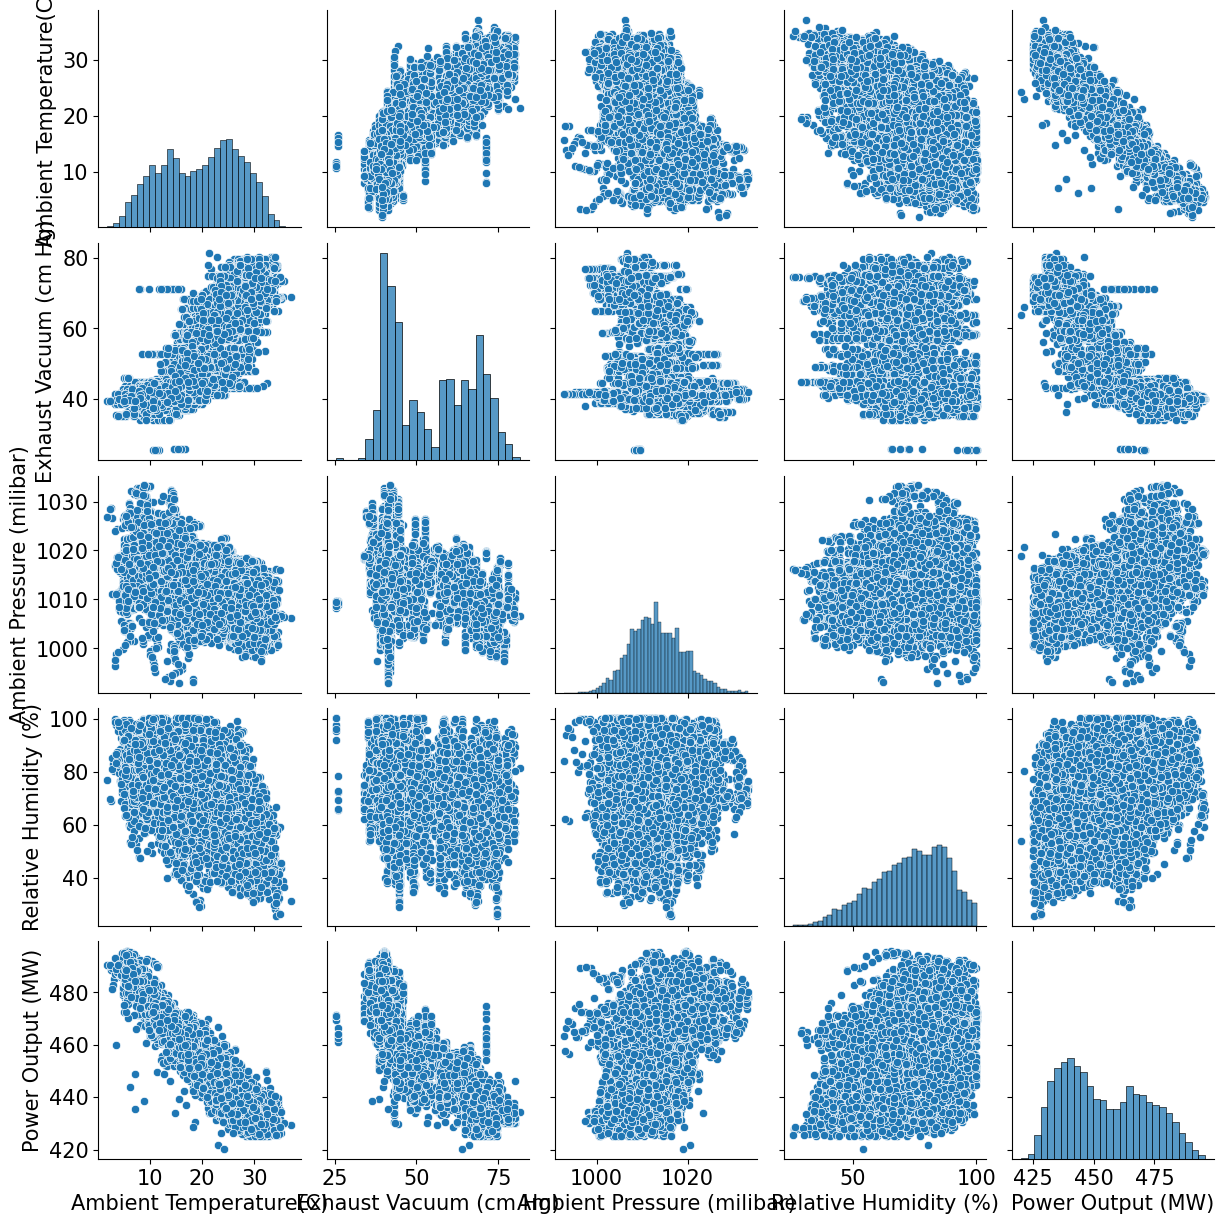

w_0=497.061 and w_1=-2.170


'Ambient Temperature vs Power Output R2 score :'

0.890774500419844

'Ambient Temperature vs Power Output Mean squared error :'

32.29712245481021

w_0=517.816 and w_1=-1.169


'Exhaust Vacuum vs Power Output R2 score :'

0.7435804190191111

'Exhaust Vacuum vs Power Output Mean squared error :'

75.82125637862939

(None, None)

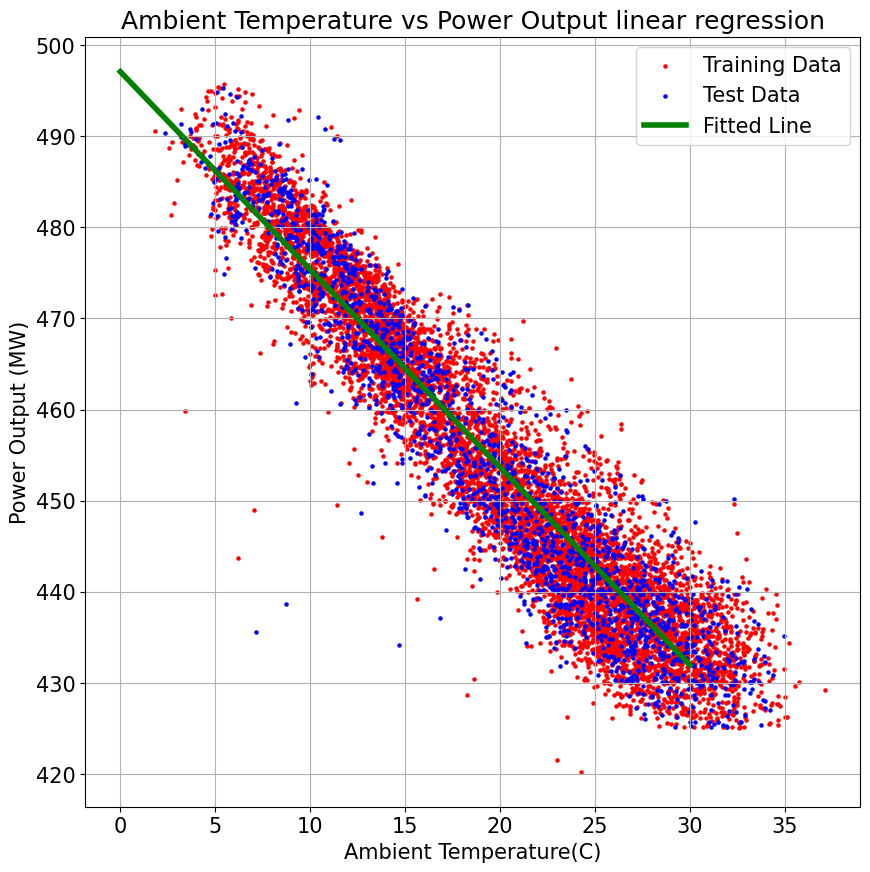

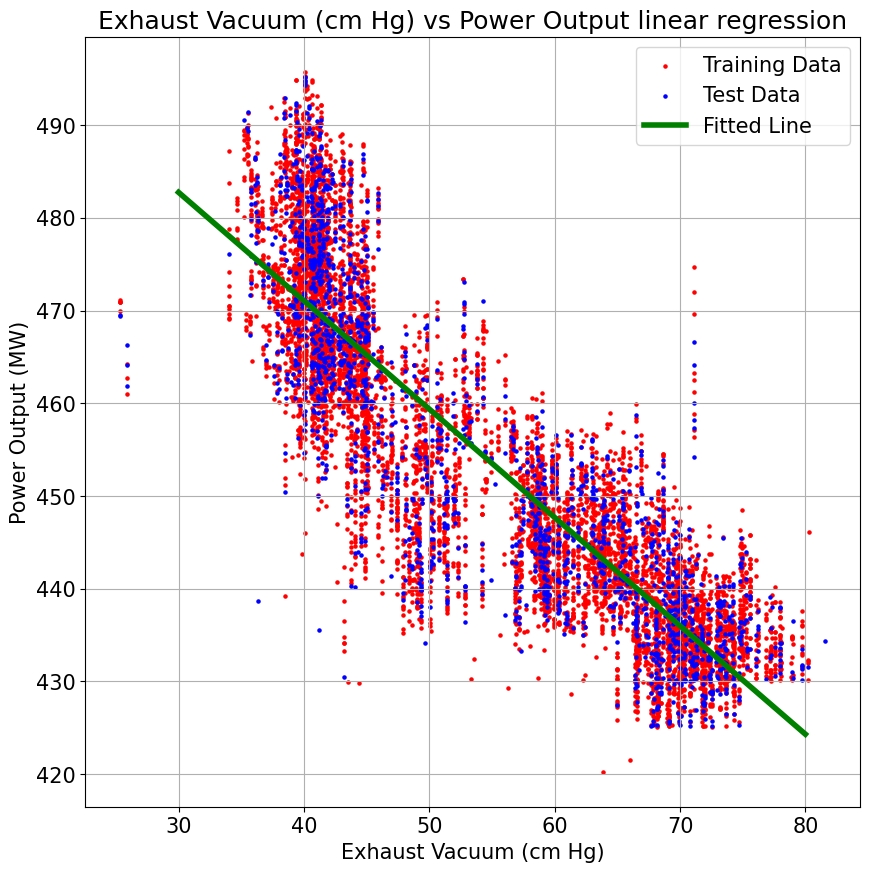

In [51]:
# Your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('C:\\Users\\tanka\\OneDrive\\바탕 화면\\Junior year\\Data_driven\\hw5\\CCPP_data.xlsx')
df = df.rename(columns={
    'AT': 'Ambient Temperature(C)',
    'V': 'Exhaust Vacuum (cm Hg)',
    'AP': 'Ambient Pressure (milibar)',
    'RH': 'Relative Humidity (%)',
    'PE': 'Power Output (MW)'
})
sns.pairplot(df)
plt.show()

#Pairwise plot show relationship between AT and V to target variable EP

# Ambient Temperature vs Power Output 
x_data1=np.array(df[['Ambient Temperature(C)']])
y_data1=np.array(df[['Power Output (MW)']])
x_train1, x_test1, y_train1, y_test1=train_test_split(x_data1, y_data1, test_size=0.2, shuffle=True, random_state=100)
lm_ATEP = LinearRegression()
lm_ATEP.fit(x_train1, y_train1)
w0l=lm_ATEP.intercept_[0]  # w_0
w1l=lm_ATEP.coef_[0][0]    # W-1
print(f'w_0={w0l:.3f} and w_1={w1l:.3f}')

#PLOTTING AT VS EP
plt.figure(figsize=(10,10))                       # set the size of the figure
plt.rc('font',size=15)                            # set the font size
# Plotting the training data
plt.scatter(x_train1, y_train1,s=5,color='red',label='Training Data')
plt.scatter(x_test1, y_test1,s=5,color='blue', label='Test Data')
xplot=np.linspace(0,30,num=100)
yplot=w0l+w1l*xplot
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')
plt.title('Ambient Temperature vs Power Output linear regression')
plt.xlabel('Ambient Temperature(C)')
plt.ylabel('Power Output (MW)')
plt.grid(True)
plt.legend(loc='best')
display("Ambient Temperature vs Power Output R2 score :", r2_score(y_test1, lm_ATEP.predict(x_test1))), display("Ambient Temperature vs Power Output Mean squared error :", mean_squared_error(y_test1, lm_ATEP.predict(x_test1)))


# Exhaust vaccum vs Power Output 
x_data2=np.array(df[['Exhaust Vacuum (cm Hg)']])
y_data2=np.array(df[['Power Output (MW)']])
x_train2, x_test2, y_train2, y_test2=train_test_split(x_data2, y_data2, test_size=0.2, shuffle=True, random_state=100)
lm_VEP = LinearRegression()
lm_VEP.fit(x_train2, y_train2)
w0l2=lm_VEP.intercept_[0]  # w_0
w1l2=lm_VEP.coef_[0][0]    # W-1
print(f'w_0={w0l2:.3f} and w_1={w1l2:.3f}')

#PLOTTING AT VS EP
plt.figure(figsize=(10,10))                       # set the size of the figure
plt.rc('font',size=15)                            # set the font size
# Plotting the training data
plt.scatter(x_train2, y_train2,s=5,color='red',label='Training Data')
plt.scatter(x_test2, y_test2,s=5,color='blue', label='Test Data')
xplot=np.linspace(30,80,num=100)
yplot=w0l2+w1l2*xplot
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')
plt.title('Exhaust Vacuum (cm Hg) vs Power Output linear regression')
plt.xlabel('Exhaust Vacuum (cm Hg)')
plt.ylabel('Power Output (MW)')
plt.grid(True)
plt.legend(loc='best')
display("Exhaust Vacuum vs Power Output R2 score :", r2_score(y_test2, lm_VEP.predict(x_test2))), display("Exhaust Vacuum vs Power Output Mean squared error :", mean_squared_error(y_test2, lm_VEP.predict(x_test2)))




<font color='blue'>__Part (b) :__</font> Develop a ridge regression model and a lasso regression model to predict the electrical energy output (PE). Still use the data in `Sheet 1` of the dataset for model development. Use all the features provided in the dataset to develop these models. Take 20% of the data for testing. And report both mean squared error and $R^2$ score for these models. Use regularization parameter $\lambda=10$.
- Compare the error and score of these models with the model you developed in part (a).
- Which feature is the most import feature for predicting PE using a regression algorithm?

In [61]:
# Your code goes here
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# 'AT': 'Ambient Temperature(C)',
#'V': 'Exhaust Vacuum (cm Hg)',
#'AP': 'Ambient Pressure (milibar)',
#'RH': 'Relative Humidity (%)',
#'PE': 'Power Output (MW)'

predictors = ['Ambient Temperature(C)', 'Exhaust Vacuum (cm Hg)', 'Ambient Pressure (milibar)', 'Relative Humidity (%)']
x_data = np.array(df[predictors]) 
y_data = np.array(df[['Power Output (MW)']]) 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=200)
lrg = Ridge(alpha = 0.1)
lso = Lasso(alpha = 0.1) 
lrg.fit(x_train, y_train) 
lso.fit(x_train, y_train) 

Lasso(alpha=0.2)

In [62]:

# printing the coefficients - lasso regression
print("\nFor lasso regression", 20*"-")
print(f"Bias term is {lso.intercept_[0]:0.3f}")
for count, coef in enumerate(lso.coef_):
    print(f"{predictors[count]} - w_{count+1}={coef:0.3f}")

# printing the coefficients - ridge regression
print("\nFor ridge regression", 20*"-")
print(f"Bias term is {lrg.intercept_[0]:0.3f}")
for count, coef in enumerate(lrg.coef_[0]):
    print(f"{predictors[count]} - w_{count+1}={coef:0.3f}")


For lasso regression --------------------
Bias term is 452.196
Ambient Temperature(C) - w_1=-1.960
Exhaust Vacuum (cm Hg) - w_2=-0.241
Ambient Pressure (milibar) - w_3=0.064
Relative Humidity (%) - w_4=-0.156

For ridge regression --------------------
Bias term is 449.522
Ambient Temperature(C) - w_1=-1.970
Exhaust Vacuum (cm Hg) - w_2=-0.238
Ambient Pressure (milibar) - w_3=0.067
Relative Humidity (%) - w_4=-0.159


In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#PREICTIONS and PERFORMANCE METRICS

# Ridge regression
yhat_ts_rg=lrg.predict(x_test)   # using test data
yhat_tr_rg=lrg.predict(x_train) # using training data
print("For Ridge regression" , 20*"-")
mse2ndp_test_rg = mean_squared_error(y_test, yhat_ts_rg)
print('Mean squared error for test data is: ', mse2ndp_test_rg)
r22ndp_test_rg = r2_score(y_test, yhat_ts_rg)
print('R2 score for test data is: ', r22ndp_test_rg)


# Lasso regression
yhat_ts_ls=lso.predict(x_test)   # using test data
yhat_tr_ls=lso.predict(x_train) # using training data
print("For Lasso regression" , 20*"-")
mse2ndp_test_ls = mean_squared_error(y_test, yhat_ts_ls)
print('Mean squared error for test data is: ', mse2ndp_test_ls)
r22ndp_test_ls = r2_score(y_test, yhat_ts_ls)
print('R2 score for test data is: ', r22ndp_test_ls)


For Ridge regression --------------------
Mean squared error for test data is:  19.972340824177035
R2 score for test data is:  0.9308057023596726
For Lasso regression --------------------
Mean squared error for test data is:  19.968470261968843
R2 score for test data is:  0.9308191119462518


- Performance of both lasso and ridge regression exceeds the one of simple linear regression. It has higher R2 data and lower MSE. 

- It can be seen that the ambient temperature is the most important variable to consider when predicting PE using regression algorithm